EDA

In [87]:
import pandas as pd
import numpy as np

# Display all rows
pd.set_option('display.max_rows', None)

# Load the dataset
file_path = 'airbnb_Chicago.csv'
df = pd.read_csv(file_path)

 
# List of columns

columns = [

    'Airbnb Host ID',

    'Airbnb Property ID',

    'superhost_period_all',

    'Scraped Date',

    'Superhost',

    'superhost_change',

    'superhost_change_lose_superhost',

    'superhost_change_gain_superhost',

    'rating_ave_pastYear',

    'numReviews_pastYear',

    'numCancel_pastYear',

    'num_5_star_Rev_pastYear',

    'prop_5_StarReviews_pastYear',

    'numReservedDays_pastYear',

    'numReserv_pastYear',

    'available_days',

    'available_days_aveListedPrice',

    'booked_days',

    'booked_days_avePrice',

    'Property Type',

    'Listing Type',

    'Created Date',

    'Bedrooms',

    'Bathrooms',

    'Neighborhood',

    'Max Guests',

    'Cleaning Fee (USD)',

    'Minimum Stay',

    'Number of Photos',

    'Pets Allowed',

    'Instantbook Enabled',

    'Nightly Rate',

    'Number of Reviews',

    'Rating Overall',

    'revenue',

    'occupancy_rate'

]
 

 

# Filter the DataFrame
df = df[columns]

# Convert Scraped Date and Created Date columns to datetime

df['Scraped Date'] = pd.to_datetime(df['Scraped Date'], errors='coerce')

df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
 
# Get the quarter start of the Scraped Date

# First convert each date to a quarterly period, then get the start time of that period

quarter_start = df['Scraped Date'].dt.to_period('Q').dt.start_time
 
# Create the property_age column as the difference in days between quarter start and created date

df['property_age_months'] = ((quarter_start.dt.year - df['Created Date'].dt.year) * 12 + (quarter_start.dt.month - df['Created Date'].dt.month))
 
# Now df has a new column 'property_age' that represents the property age in days
pd.set_option('display.max_columns', None)

df.head()

df.to_csv('airbnb_Chicago_selected_columns.csv')

In [63]:
filtered_df = pd.read_csv('airbnb_Chicago_selected_columns.csv')

In [80]:
len(columns_to_select)

36

Checking for nulls

In [64]:
import pandas as pd

# Display all rows
pd.set_option('display.max_rows', None)

# Check missing values again
missing_values = filtered_df.isnull().sum()
missing_percentage = (missing_values / len(filtered_df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary.sort_values(by='Percentage', ascending=False))

                                 Missing Values  Percentage
occupancy_rate                            38108   31.699344
revenue                                   38108   31.699344
booked_days_avePrice                      38108   31.699344
booked_days                               38108   31.699344
Cleaning Fee (USD)                        24158   20.095328
rating_ave_pastYear                       19845   16.507649
numReviews_pastYear                       18798   15.636724
numCancel_pastYear                        18798   15.636724
available_days_aveListedPrice             15027   12.499896
available_days                            15027   12.499896
Rating Overall                            14776   12.291107
numReservedDays_pastYear                   3514    2.923047
numReserv_pastYear                         3514    2.923047
Neighborhood                               1146    0.953276
Bathrooms                                    47    0.039096
Number of Reviews                       

In [65]:
# List of columns where null values should be checked
columns_to_check = [
    # "tractQuartilePrice_variance",
    # "Nightly Rate_tractQuartile",
    # "tract_price_variance",
    "numReserv_pastYear",
    "numReservedDays_pastYear",
    "Neighborhood",
    "Bathrooms",
    "Number of Reviews",
    "Bedrooms",
    "Max Guests",
    "Number of Photos",
    "Minimum Stay",
    "Property Type"
]

# Drop rows where any of the specified columns have null values
filtered_df = filtered_df.dropna(subset=columns_to_check)

In [66]:
import pandas as pd

# Display all rows
pd.set_option('display.max_rows', None)

# Check missing values again
missing_values = filtered_df.isnull().sum()
missing_percentage = (missing_values / len(filtered_df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary.sort_values(by='Percentage', ascending=False))

                                 Missing Values  Percentage
occupancy_rate                            34433   29.813412
revenue                                   34433   29.813412
booked_days_avePrice                      34433   29.813412
booked_days                               34433   29.813412
Cleaning Fee (USD)                        22268   19.280488
rating_ave_pastYear                       16318   14.128750
numReviews_pastYear                       15376   13.313130
numCancel_pastYear                        15376   13.313130
Rating Overall                            13063   11.310446
available_days                            11971   10.364951
available_days_aveListedPrice             11971   10.364951
Longitude                                     0    0.000000
Pets Allowed                                  0    0.000000
Instantbook Enabled                           0    0.000000
Bathrooms                                     0    0.000000
Latitude                                

In [67]:
common_missing_records = [
    'Rating Overall', 
    'rating_ave_pastYear',
    'numReserv_pastYear']

# Dropping rows where any of the specified columns have null values
filtered_df.dropna(subset=common_missing_records, inplace=True)

In [68]:
import pandas as pd

# Display all rows
pd.set_option('display.max_rows', None)

# Check missing values again
missing_values = filtered_df.isnull().sum()
missing_percentage = (missing_values / len(filtered_df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary.sort_values(by='Percentage', ascending=False))

                                 Missing Values  Percentage
occupancy_rate                            23384   25.532565
revenue                                   23384   25.532565
booked_days_avePrice                      23384   25.532565
booked_days                               23384   25.532565
Cleaning Fee (USD)                        14627   15.970956
available_days_aveListedPrice              7522    8.213135
available_days                             7522    8.213135
Minimum Stay                                  0    0.000000
Bathrooms                                     0    0.000000
Neighborhood                                  0    0.000000
Max Guests                                    0    0.000000
Number of Photos                              0    0.000000
Zipcode                                       0    0.000000
Latitude                                      0    0.000000
Longitude                                     0    0.000000
Pets Allowed                            

In [69]:
from sklearn.experimental import enable_iterative_imputer  # Required to enable IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import HistGradientBoostingRegressor

# Columns to impute
columns_to_impute = [
    "booked_days",
    "occupancy_rate",
    "booked_days_avePrice",
    "revenue",
    "Cleaning Fee (USD)",
    "available_days_aveListedPrice",
    "available_days",
]

# Initialize IterativeImputer with HistGradientBoostingRegressor
imputer = IterativeImputer(estimator=HistGradientBoostingRegressor(), max_iter=20, random_state=0)

# Apply imputation only on the selected columns
df_imputed = filtered_df.copy()
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

df_imputed = df_imputed.drop(columns=["Unnamed: 0"]) 


/Users/vishnuanand/Library/Python/3.9/lib/python/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [70]:
import pandas as pd

# Display all rows
pd.set_option('display.max_rows', None)

# Check missing values again
missing_values = df_imputed.isnull().sum()
missing_percentage = (missing_values / len(df_imputed)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary.sort_values(by='Percentage', ascending=False))

                                 Missing Values  Percentage
Airbnb Host ID                                0         0.0
Created Date                                  0         0.0
Bedrooms                                      0         0.0
Bathrooms                                     0         0.0
Neighborhood                                  0         0.0
Max Guests                                    0         0.0
Cleaning Fee (USD)                            0         0.0
Minimum Stay                                  0         0.0
Number of Photos                              0         0.0
Latitude                                      0         0.0
Longitude                                     0         0.0
Pets Allowed                                  0         0.0
Instantbook Enabled                           0         0.0
Nightly Rate                                  0         0.0
Number of Reviews                             0         0.0
Rating Overall                          

Outlier handling

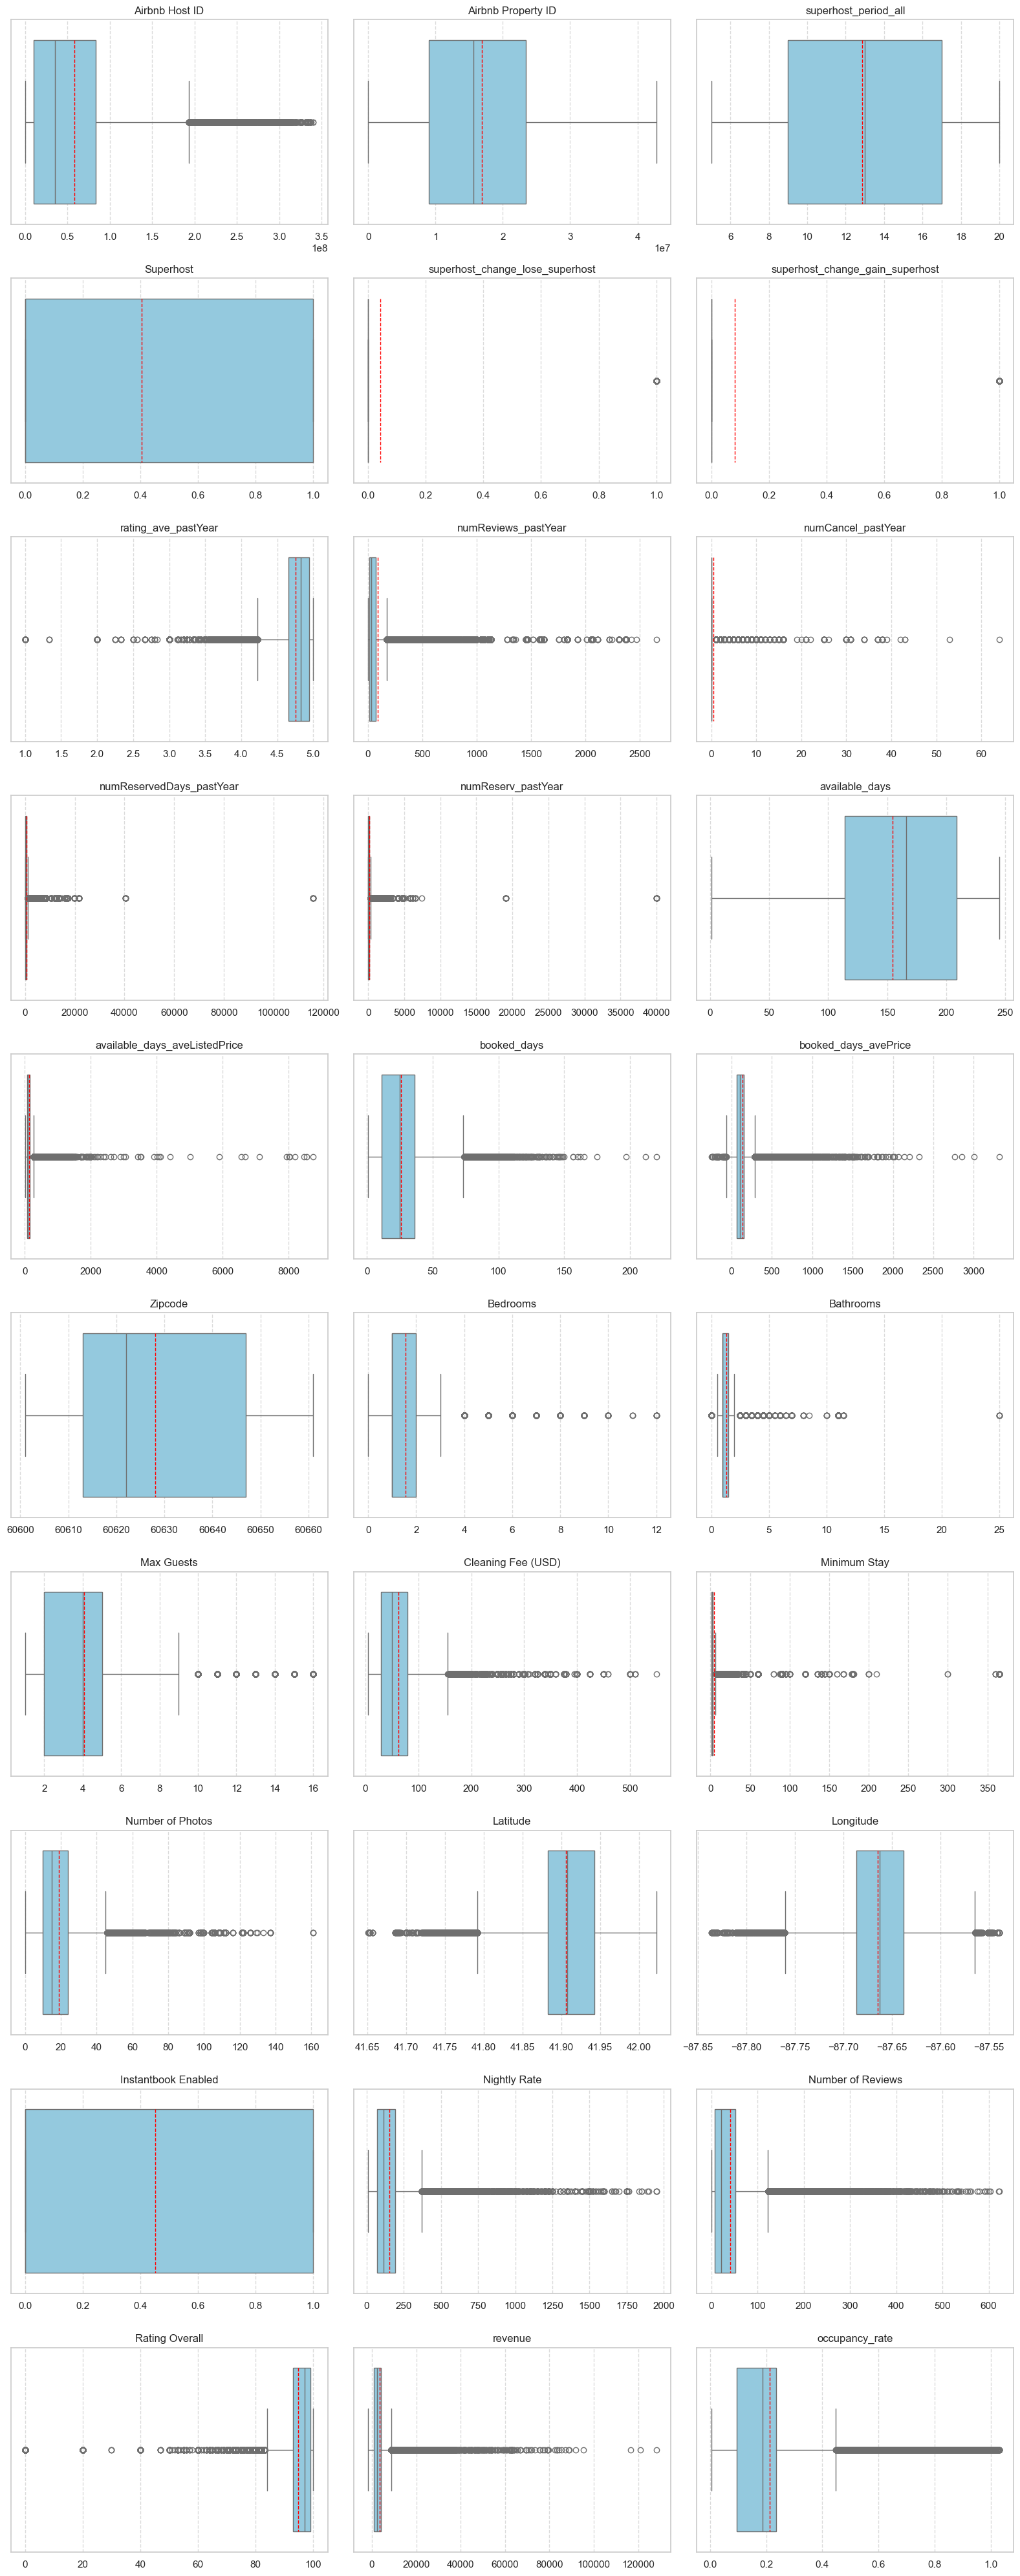

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Set a visual theme
sns.set_theme(style="whitegrid")

# Get numerical columns
numerical_columns = df_imputed.select_dtypes(include='number').columns

# Determine the grid size
n_cols = 3  # Number of plots per row
n_rows = math.ceil(len(numerical_columns) / n_cols)  # Number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(
        x=df_imputed[column],
        ax=axes[i],
        color="skyblue",
        showmeans=True,
        meanline=True,
        meanprops={"color": "red", "linestyle": "--"}
    )
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].grid(axis="x", linestyle="--", alpha=0.7)

# Remove unused subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Correlation Analysis

30


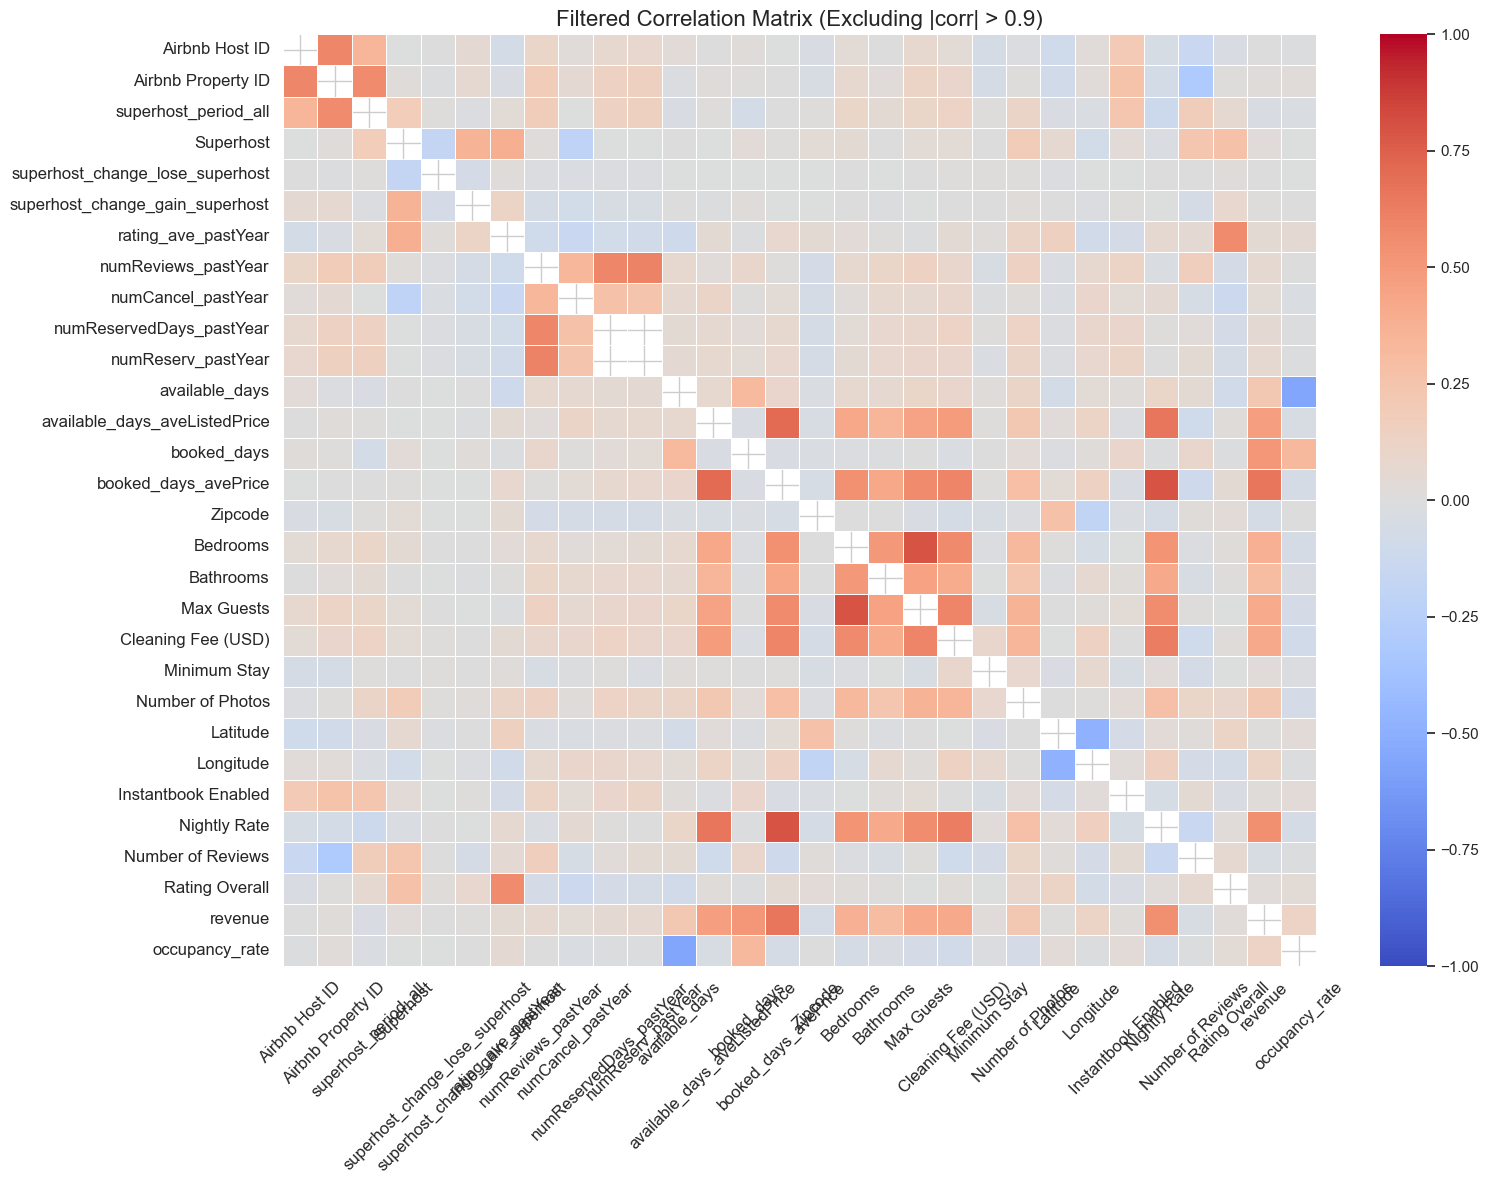

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numerical_columns = df_imputed.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Mask correlations greater than 0.9 or less than -0.9
filtered_matrix = correlation_matrix.where((correlation_matrix < 0.9) & (correlation_matrix > -0.9))

print(len(filtered_matrix))

# Plot the filtered correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(
    filtered_matrix,
    cmap="coolwarm",   # Color map
    vmin=-1, vmax=1,   # Range of correlations
    linewidths=0.5,    # Line width between cells
    cbar=True          # Show color bar
)
plt.title("Filtered Correlation Matrix (Excluding |corr| > 0.9)", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [75]:
import pandas as pd

# Filter columns with |correlation| <= 0.9
important_columns = filtered_matrix.columns[filtered_matrix.notnull().any()].tolist()

# Create a new DataFrame with these columns
df_important = df_imputed[important_columns]

# Display the first few rows of the reduced DataFrame
print(f"Selected {len(important_columns)} important columns:")
df_important.head()

Selected 30 important columns:


,Airbnb Host ID,Airbnb Property ID,superhost_period_all,Superhost,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,numCancel_pastYear,numReservedDays_pastYear,...,Minimum Stay,Number of Photos,Latitude,Longitude,Instantbook Enabled,Nightly Rate,Number of Reviews,Rating Overall,revenue,occupancy_rate
0,2153.0,1947.0,13.0,0.0,0.0,0.0,5.000000,2.0,0.0,20.0,...,30.0,7.0,41.90246,-87.63405,1,60.00,1.0,80.0,1011.358046,0.200710
1,2153.0,1947.0,15.0,0.0,0.0,0.0,5.000000,12.0,1.0,210.0,...,30.0,7.0,41.90246,-87.63405,1,57.00,2.0,80.0,145.383411,0.996456
2,2153.0,1947.0,18.0,1.0,0.0,1.0,4.733333,15.0,0.0,365.0,...,30.0,7.0,41.90246,-87.63405,0,57.00,2.0,80.0,818.735478,0.186072
3,2153.0,1947.0,19.0,0.0,1.0,0.0,4.625000,16.0,0.0,406.0,...,30.0,7.0,41.90246,-87.63405,0,47.25,3.0,90.0,578.959278,0.182604
4,2153.0,1947.0,20.0,0.0,0.0,0.0,4.692308,26.0,0.0,454.0,...,30.0,7.0,41.90246,-87.63405,0,48.00,4.0,93.0,424.984576,0.245875


In [76]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure VIF values are not displayed in scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Select only numerical columns for VIF calculation
numerical_columns = df_important.select_dtypes(include=['number'])

# Calculate VIF for each numerical column
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_columns.columns
vif_data["VIF"] = [
    variance_inflation_factor(numerical_columns.values, i) 
    for i in range(numerical_columns.shape[1])
]

# Sort VIF values in descending order for better readability
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Reset pandas display option after printing if needed
pd.reset_option('display.float_format')

# Display VIF in tabular form
print(vif_data)

                            Feature        VIF
0                numReserv_pastYear  16.820994
1          numReservedDays_pastYear  16.569543
2              booked_days_avePrice   4.943175
3                           revenue   3.653061
4                      Nightly Rate   3.531421
5                        Max Guests   3.299360
6                          Bedrooms   3.103025
7                       booked_days   3.031689
8                Airbnb Property ID   2.759015
9                    available_days   2.503141
10                   occupancy_rate   2.454110
11               Cleaning Fee (USD)   2.280026
12    available_days_aveListedPrice   2.147790
13             superhost_period_all   2.052145
14              numReviews_pastYear   1.871089
15              rating_ave_pastYear   1.686103
16                Number of Reviews   1.648936
17                        Superhost   1.624204
18                   Airbnb Host ID   1.567250
19                   Rating Overall   1.496207
20           

Random Forest Classifier for feature selection

In [57]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Step 1: Load dataset and separate features and target
target_column = "Superhost" 
X = df_important.drop(columns=[target_column])
y = df_important[target_column]

# Step 2: Handle categorical variables with one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Train a Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_encoded, y)

# Step 4: Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Step 5: Select top features based on threshold
threshold = 0.0014  # Adjust the threshold as needed
top_features = feature_importance[feature_importance['Importance'] > threshold]

# Step 6: Reduce dataset to top features
X_reduced = X_encoded[top_features['Feature']]

# Step 7: Combine reduced dataset with the target column
df_reduced_for_analysis = pd.concat([X_reduced, y.reset_index(drop=True)], axis=1)

# Step 8: Generate list of dropped columns
dropped_columns = list(set(X_encoded.columns) - set(top_features['Feature']))
print("Columns dropped:", dropped_columns)

# Step 9: Save reduced dataset and dropped columns
df_reduced_for_analysis.to_csv("airbnb_Chicago_reduced_for_analysis.csv", index=False)

# Save dropped columns to a text file for reference
with open("dropped_columns.txt", "w") as file:
    for col in dropped_columns:
        file.write(f"{col}\n")

# Step 10: Display information
print("Reduced Dataset Shape:", df_reduced_for_analysis.shape)
print("Number of columns dropped:", len(dropped_columns))

Columns dropped: ['tractQuartilePrice_variance', 'booked_days', 'zip_black_nothispanic_percent', 'tract_total_pop', 'tract_booking_share', 'Zipcode', 'tract_price_variance', 'prev_available_days_aveListedPrice_tractQuartile', 'zip_asian_nothispanic', 'available_days_aveListedPrice_tractQuartile', 'booked_days_period_city', 'tract_black_perc', 'prev_Nightly Rate_tractQuartile', 'census_tract', 'zip_total_population', 'prev_Instantbook Enabled', 'prev_booked_days_avePrice', 'tract_housing_units', 'revenue', 'Bedrooms', 'tract_white_perc', 'tract_count_obs', 'booked_days_period_tract', 'occupancy_rate', 'Minimum Stay', 'tract_asian_perc', 'Instantbook Enabled', 'Bathrooms', 'zip_hispanic_or_latino_anyrace', 'revenue_period_city', 'tract_revenue_share', 'zip_white_nothispanic_percent', 'Max Guests', 'tract_unique_prices', 'zip_white_nothispanic', 'revenue_period_tract', 'zip_black_nothispanic', 'Nightly Rate_tractQuartile', 'zip_hispanic_or_latino_anyrace_percent', 'zip_asian_nothispanic_p

In [60]:
# Sort the feature_importance DataFrame in ascending order by 'Importance'
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print("Feature Importance (Sorted in Ascending Order):")
print(feature_importance_sorted)

Feature Importance (Sorted in Ascending Order):
                                             Feature  Importance
3                   prev_host_is_superhost_in_period    0.168498
5                    superhost_change_gain_superhost    0.115411
6                                rating_ave_pastYear    0.106203
72                           prev_host_is_superhost1    0.085506
10                          prev_rating_ave_pastYear    0.063897
4                    superhost_change_lose_superhost    0.057782
8                                 numCancel_pastYear    0.050615
9                            num_5_star_Rev_pastYear    0.042781
7                                numReviews_pastYear    0.040736
41                               prev_Rating Overall    0.035786
12                           prev_numCancel_pastYear    0.031222
40                                    Rating Overall    0.022036
68                            tract_superhosts_ratio    0.021798
15                                numReser

In [61]:
df_reduced_for_analysis.head()

,prev_host_is_superhost_in_period,superhost_change_gain_superhost,rating_ave_pastYear,prev_host_is_superhost1,prev_rating_ave_pastYear,superhost_change_lose_superhost,numCancel_pastYear,num_5_star_Rev_pastYear,numReviews_pastYear,prev_Rating Overall,...,prev_occupancy_rate,available_days,prev_booked_days,Latitude,Cleaning Fee (USD),prev_available_days_aveListedPrice,Nightly Rate,booked_days_avePrice,available_days_aveListedPrice,Superhost
0,0.0,0.0,5.000000,0.0,5.000000,0.0,0.0,2.0,2.0,97.380530,...,0.187750,78.0,25.052463,41.90246,39.861128,62.094891,60.00,62.561646,61.987179,0.0
1,0.0,0.0,5.000000,0.0,5.000000,0.0,1.0,12.0,12.0,98.612394,...,0.960377,2.0,31.820408,41.90246,32.478535,57.812500,57.00,56.024379,55.000000,0.0
2,0.0,1.0,4.733333,0.0,4.826087,0.0,0.0,11.0,15.0,96.423938,...,0.241681,96.0,21.196565,41.90246,40.018429,46.415730,57.00,46.822927,46.875000,1.0
3,1.0,0.0,4.625000,0.0,4.733333,1.0,0.0,11.0,16.0,80.000000,...,0.378873,66.0,36.116004,41.90246,49.434769,46.875000,47.25,46.373904,47.833333,0.0
4,0.0,0.0,4.692308,1.0,4.625000,0.0,0.0,20.0,26.0,90.000000,...,0.470670,36.0,30.766620,41.90246,48.448937,47.833333,48.00,49.168710,46.861111,0.0
